<a href="https://colab.research.google.com/github/awitz23/master_thesis/blob/main/Lernen_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from google.colab import drive
drive.mount('/content/drive')

# Pfad zu einem Ordner mit mehreren Dateien
data_path = r"/content/drive/MyDrive/Predictive_Lernen_Anfang/HistoricalData_1681684855015.csv"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
pip install pandas numpy keras tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [86]:
import pandas as pd
df = data_path

In [87]:
df_raw = pd.DataFrame(pd.read_csv(data_path))


In [88]:
df = df_raw.head(253)

In [89]:
df

,Date,Close/Last,Volume,Open,High,Low
0,04/14/2023,$127.42,980031,$127.72,$128.17,$126.70
1,04/13/2023,$128.05,1132137,$127.06,$128.49,$127.06
2,04/12/2023,$127.11,1318428,$127.59,$128.115,$126.79
3,04/11/2023,$126.54,1146772,$126.69,$127.05,$126.345
4,04/10/2023,$127.45,604419,$127.60,$127.60,$125.80
...,...,...,...,...,...,...
248,04/19/2022,$105.24,1106544,$104.29,$105.33,$104.16
249,04/18/2022,$104.22,1020803,$103.92,$104.79,$103.20
250,04/14/2022,$103.89,914576,$105.65,$105.73,$103.89
251,04/13/2022,$105.92,1154938,$104.29,$106.005,$104.06


In [90]:
df = df[['Date', 'Close/Last']]
df.head()

,Date,Close/Last
0,04/14/2023,$127.42
1,04/13/2023,$128.05
2,04/12/2023,$127.11
3,04/11/2023,$126.54
4,04/10/2023,$127.45


In [91]:
df.dtypes

Date          object
Close/Last    object
dtype: object

In [92]:
df = df.replace({'\$':''}, regex = True)
df.head()

,Date,Close/Last
0,04/14/2023,127.42
1,04/13/2023,128.05
2,04/12/2023,127.11
3,04/11/2023,126.54
4,04/10/2023,127.45


In [93]:
df = df.astype({"Close/Last": float})
df["Date"] = pd.to_datetime(df.Date, format="%m/%d/%Y")
df.dtypes

Date          datetime64[ns]
Close/Last           float64
dtype: object

In [94]:
df.index = df['Date']
df.head()

#SEHR SEHR WICHTIG UND GUT ZU WISSEN

,Date,Close/Last
Date,,
2023-04-14,2023-04-14,127.42
2023-04-13,2023-04-13,128.05
2023-04-12,2023-04-12,127.11
2023-04-11,2023-04-11,126.54
2023-04-10,2023-04-10,127.45


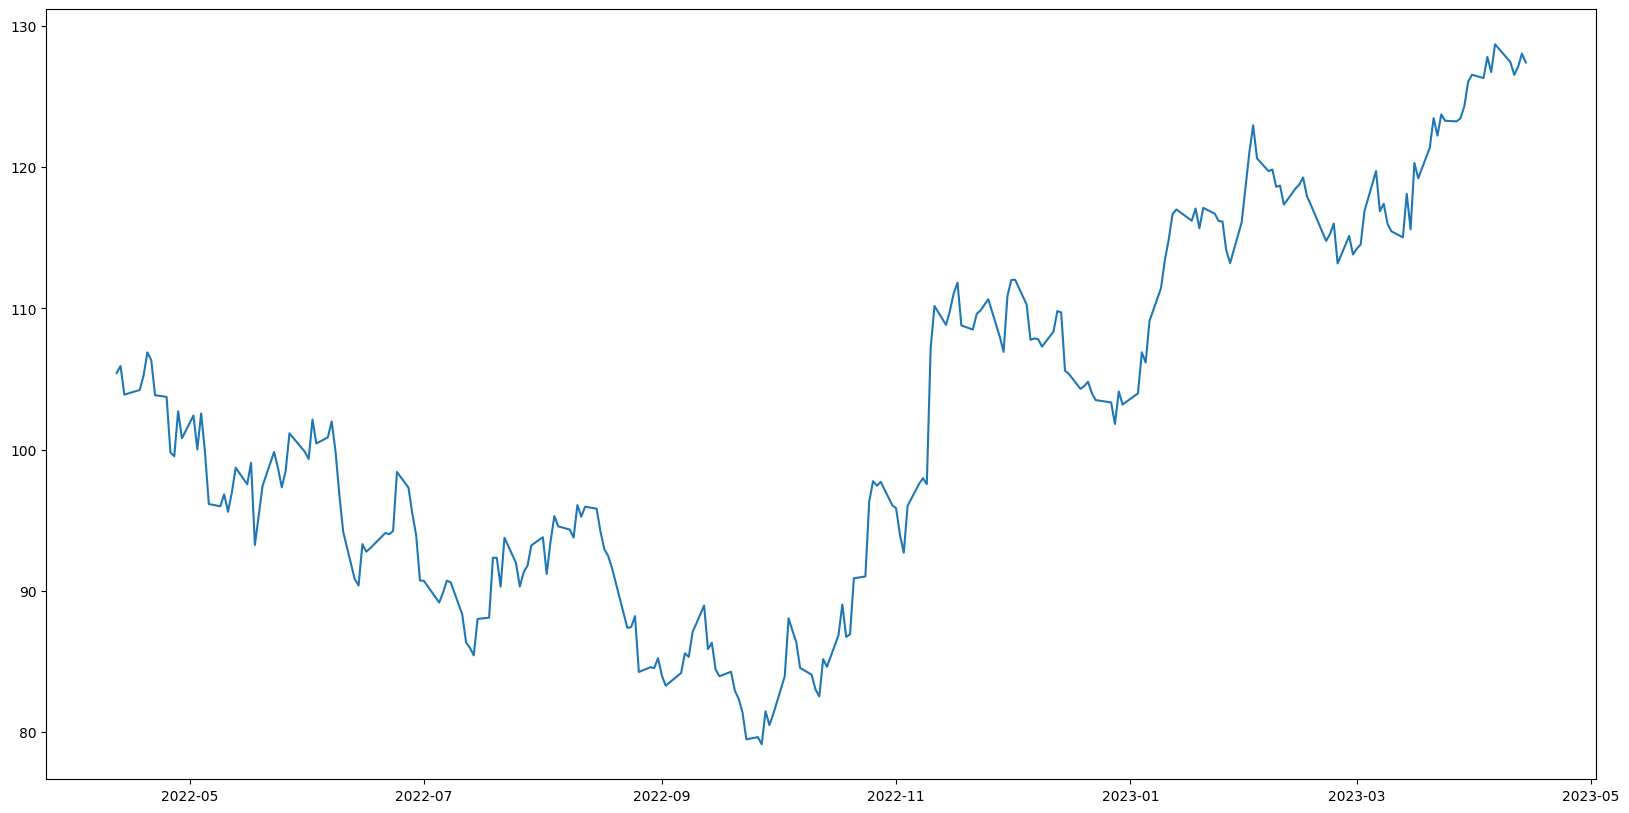

In [95]:
plt.plot(df["Close/Last"],label='Close Price history')


In [96]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close/Last'])


for i in range(0,len(data)):
    data["Date"][i]=df['Date'][i]
    data["Close/Last"][i]=df["Close/Last"][i]
data.head()

,Date,Close/Last
0,2022-04-12 00:00:00,105.42
1,2022-04-13 00:00:00,105.92
2,2022-04-14 00:00:00,103.89
3,2022-04-18 00:00:00,104.22
4,2022-04-19 00:00:00,105.24


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.Date
data.drop("Date",axis=1,inplace=True)
final_data = data.values

train_data=final_data[0:200,:]

valid_data=final_data[200:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])


x_train_data = np.asarray(x_train_data)
y_train_data = np.asarray(y_train_data)


In [98]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [107]:
lstm_model.compile(loss="mean_squared_error",optimizer="adam")
lstm_model.fit(x_train_data,y_train_data,epochs=15,batch_size=1,verbose=2)
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

Epoch 1/15
140/140 - 6s - loss: 0.0018 - 6s/epoch - 44ms/step
Epoch 2/15
140/140 - 3s - loss: 0.0023 - 3s/epoch - 21ms/step
Epoch 3/15
140/140 - 3s - loss: 0.0021 - 3s/epoch - 21ms/step
Epoch 4/15
140/140 - 3s - loss: 0.0018 - 3s/epoch - 24ms/step
Epoch 5/15
140/140 - 3s - loss: 0.0018 - 3s/epoch - 21ms/step
Epoch 6/15
140/140 - 3s - loss: 0.0019 - 3s/epoch - 22ms/step
Epoch 7/15
140/140 - 3s - loss: 0.0021 - 3s/epoch - 22ms/step
Epoch 8/15
140/140 - 3s - loss: 0.0018 - 3s/epoch - 25ms/step
Epoch 9/15
140/140 - 3s - loss: 0.0017 - 3s/epoch - 22ms/step
Epoch 10/15
140/140 - 3s - loss: 0.0015 - 3s/epoch - 21ms/step
Epoch 11/15
140/140 - 3s - loss: 0.0020 - 3s/epoch - 22ms/step
Epoch 12/15
140/140 - 4s - loss: 0.0017 - 4s/epoch - 25ms/step
Epoch 13/15
140/140 - 3s - loss: 0.0016 - 3s/epoch - 22ms/step
Epoch 14/15
140/140 - 3s - loss: 0.0023 - 3s/epoch - 22ms/step
Epoch 15/15
140/140 - 3s - loss: 0.0020 - 3s/epoch - 22ms/step


In [103]:
predicted_stock_price=lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 14ms/step


<ipython-input-101-36b943cd77a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_stock_price


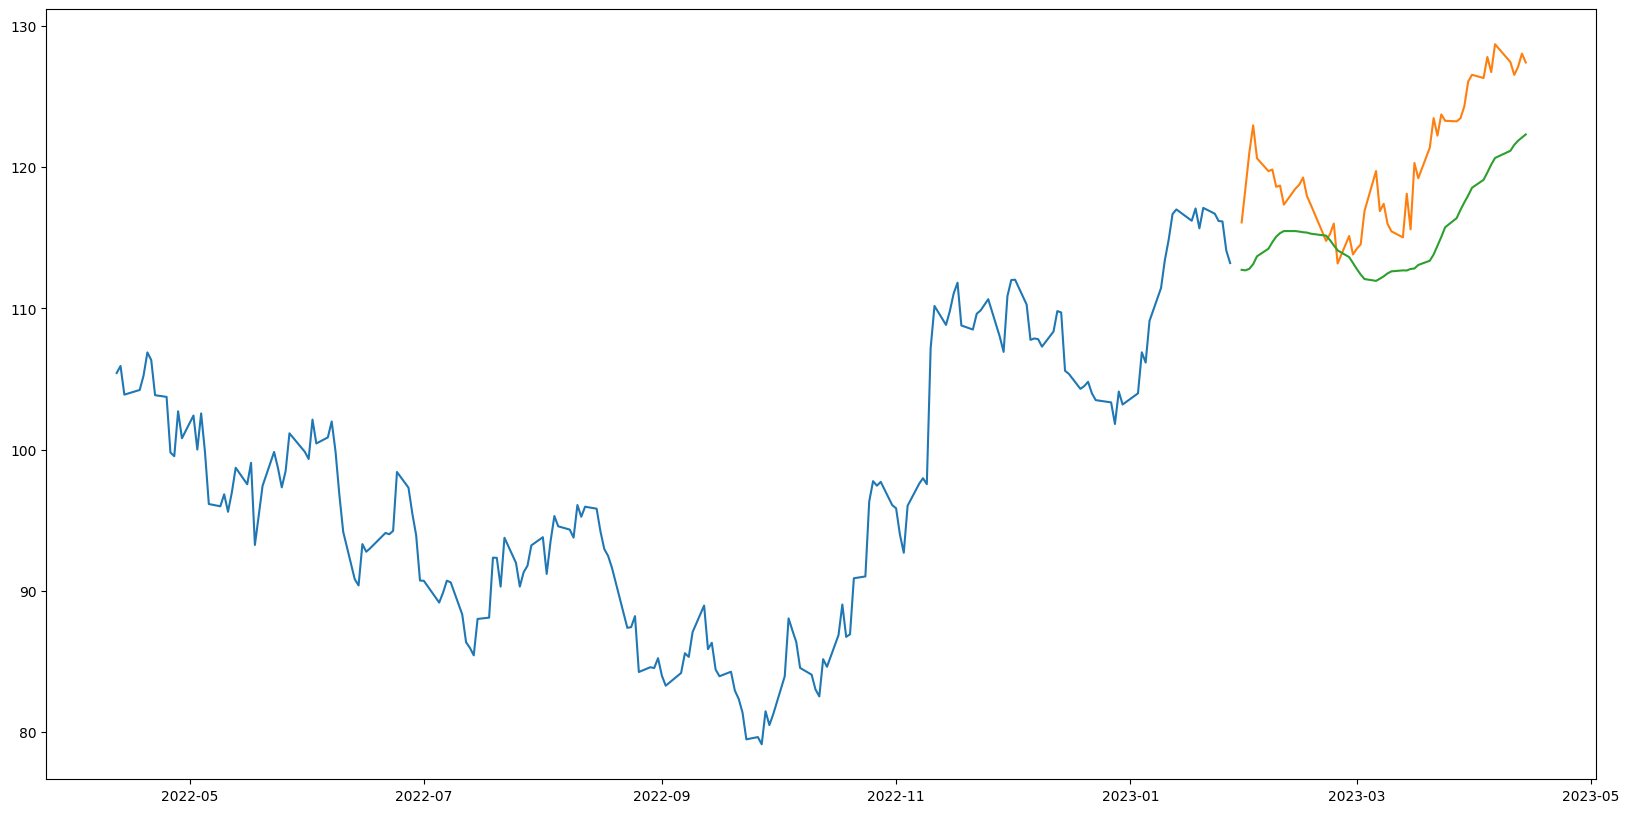

In [101]:
train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close/Last"])
plt.plot(valid_data[['Close/Last',"Predictions"]])

<ipython-input-104-36b943cd77a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_stock_price


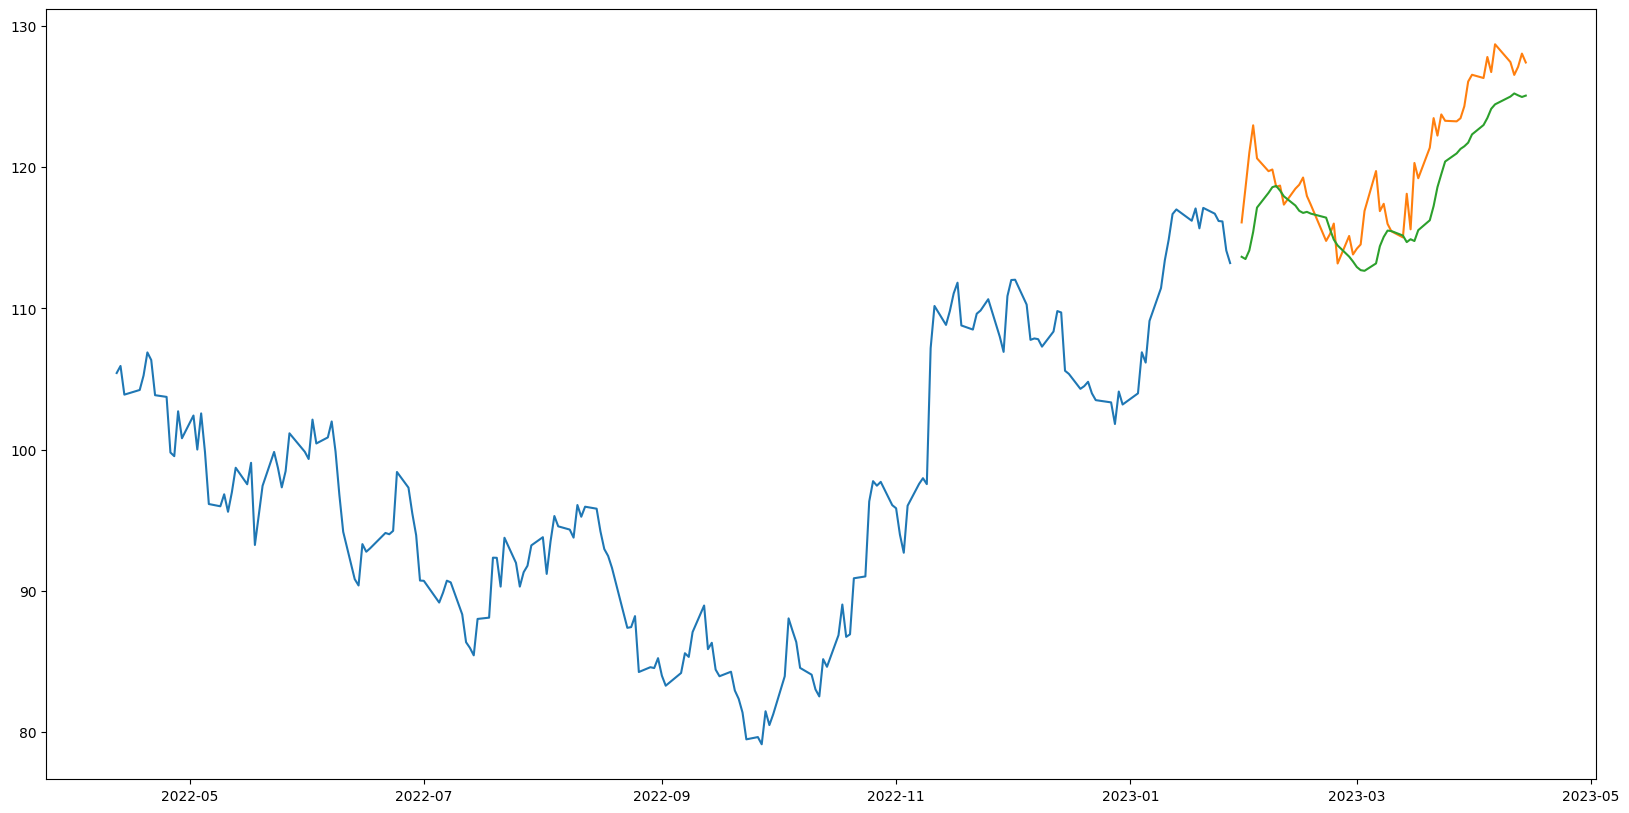

In [104]:
train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close/Last"])
plt.plot(valid_data[['Close/Last',"Predictions"]])

<ipython-input-109-36b943cd77a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_stock_price


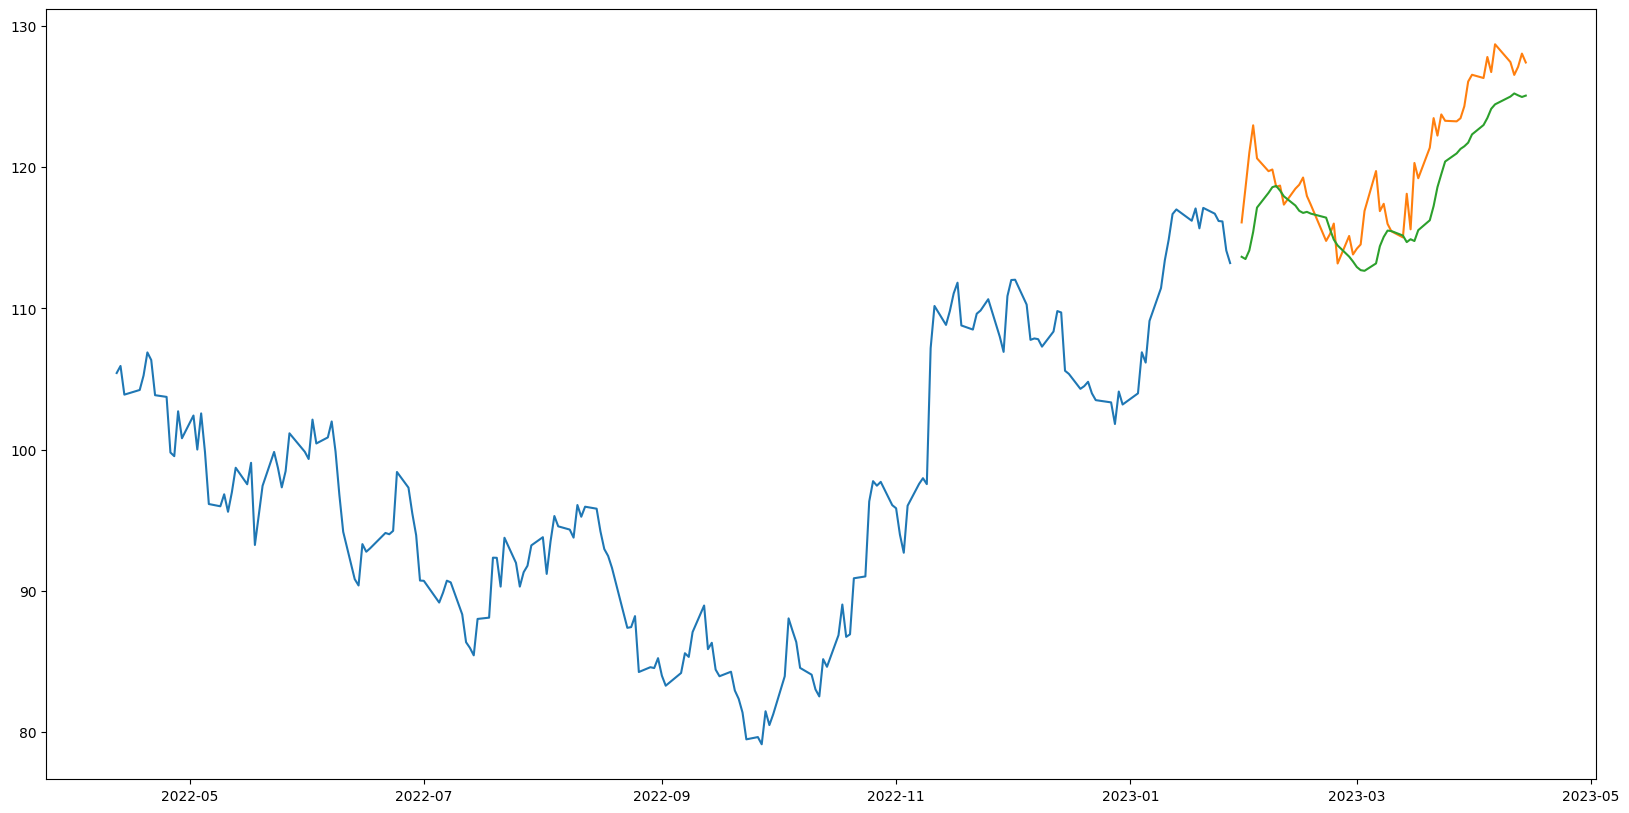

In [109]:
train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close/Last"])
plt.plot(valid_data[['Close/Last',"Predictions"]])